# Predict the Salary based on experience - Simple Linear Regression

## Linear Regression using Excel :

Equation: y = mx + c; m is slope and c is y_intercept

#### Steps for Linear regression:
1. Calculate the mean of dependent and independent variables, i.e, Ymean and Xmean
2. Calculate slope and y_intercept
3. Generate scatter plot in excel (insert->chart->scatter)
4. The r2 score shown on the chart is for the whole data but we calculate for training and test data separate while working with python code.

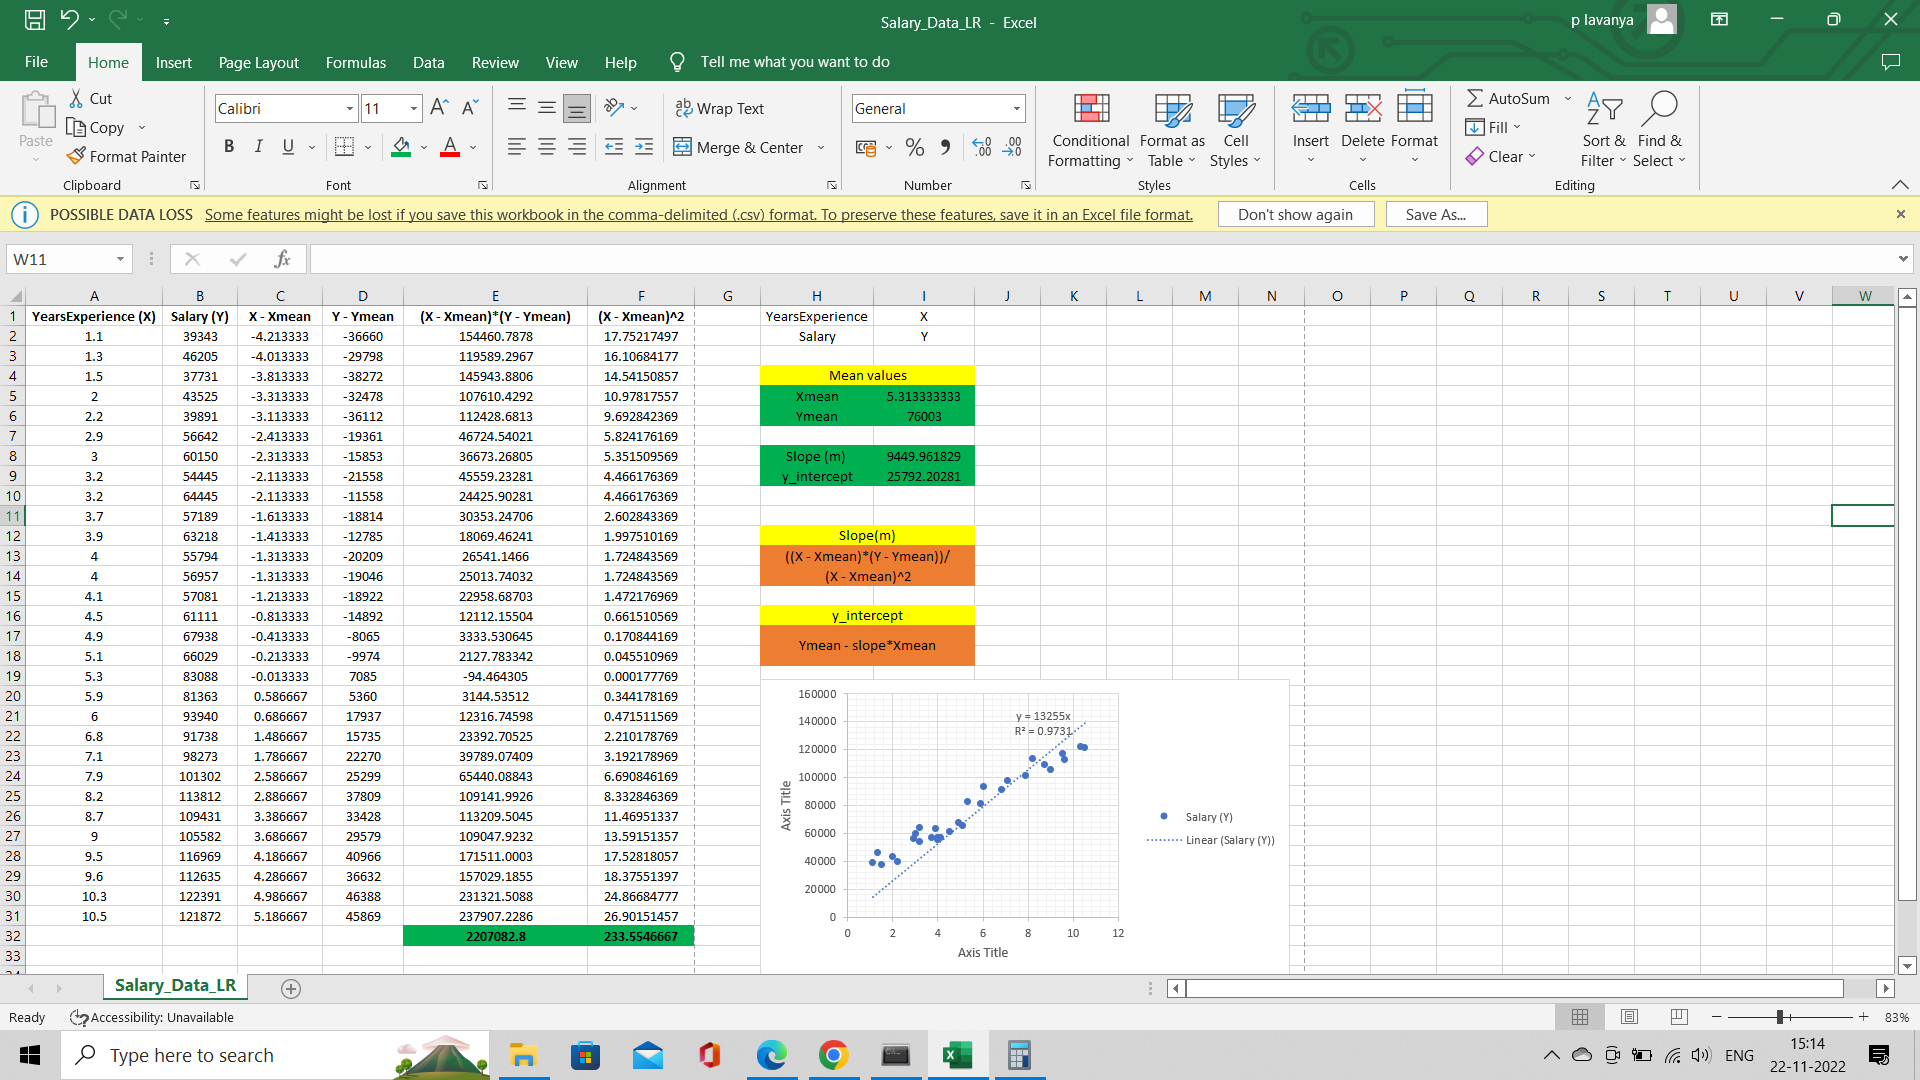

# Linear Regression using python code

## Import and Understand the Data

In [1]:
#importing libraries

import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../input/salary-data-simple-linear-regression/Salary_Data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.shape

(30, 2)

In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Data Visualization

Salary - predicted variable(Dependent variable)

YearsExperience - Independent variable

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

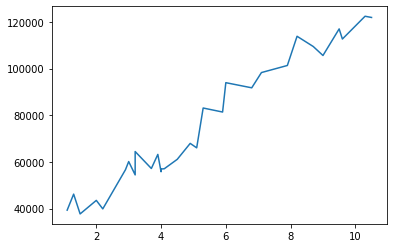

In [9]:
# yearsexperience Vs Salary
x = data.YearsExperience
y = data.Salary
plt.plot(x,y)

<BarContainer object of 30 artists>

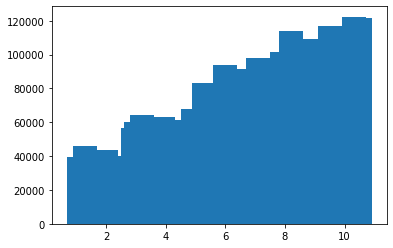

In [10]:
plt.bar(x,y)

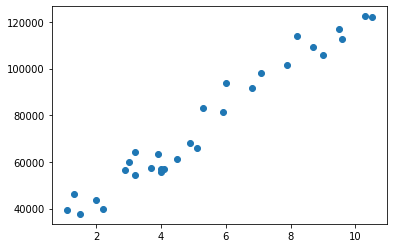

In [11]:
plt.scatter(x,y) #clearly indicates linear fit line 

# Model Building - Linear Regression

Simple Linear regression can be used here as we have a single dependent and independent variable.

Steps involved for building a model :
 - Split data into train and test set
 - Apply linear regression and fit the model on train data
 - Predict the model on test data
 - Performance metrics - r2score and mean squared error

In [12]:
x.shape,y.shape 

((30,), (30,))

In [13]:
x,y = x.to_numpy(),y.to_numpy()
x,y = x.reshape(-1,1),y.reshape(-1,1)
x.shape,y.shape

((30, 1), (30, 1))

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [16]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Since Linear Regression equation is y=b0 + b1x

calculate the coefficient(b1) and intercept(b0) values, optimal values will lead to minimized error

In [17]:
model.coef_

array([[9616.4401604]])

In [18]:
model.intercept_

array([24460.46882321])

In [19]:
y_pred = model.predict(x_test)
y_pred

array([[123509.80247536],
       [ 61964.58544879],
       [100430.3460904 ],
       [ 53309.78930442],
       [ 55233.0773365 ],
       [ 71581.02560919]])

In [20]:
# finding the error 
error = y_pred - y_test
error

array([[ 1118.80247536],
       [-1253.41455121],
       [ -871.6539096 ],
       [-6840.21069558],
       [-9211.9226635 ],
       [ 3643.02560919]])

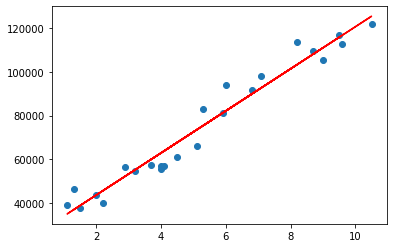

In [21]:
# plot the best fit line for train set

plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color='red')

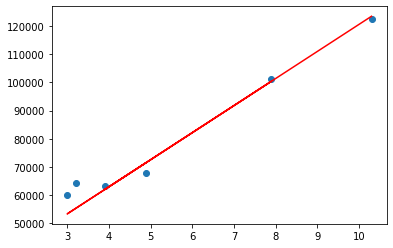

In [22]:
# plot the best fit line for test set

plt.scatter(x_test,y_test)
plt.plot(x_test,model.predict(x_test),color='red')

# Check with the Performance metrics - r2_score, mean squared error

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(rmse,r2)

4974.973779855891 0.9551871236960019


# Final conclusion - 
If r2 score is closer to 1, the model is said to be efficient with best fit line

Since, in this model the r2_score is 0.98, it is a best fit model